['normal (12).png', 'normal (2).png', 'normal (21).png', 'normal (11).png', 'normal (14).png', 'normal (22).png', 'normal (3).png', 'normal (1).png', 'normal (10).png', 'normal (16).png', 'normal (19).png', 'normal (17).png', 'normal (23).png', 'normal (13).png', 'normal (18).png', 'normal (20).png', 'normal (4).png', 'normal (15).png', 'normal (24).png', 'normal (6).png', 'normal (7).png', 'normal (9).png', 'normal (8).png', 'normal (5).png', 'normal (130).png', 'normal (125).png', 'normal (25).png', 'normal (123).png', 'normal (129).png', 'normal (112).png', 'normal (110).png', 'normal (126).png', 'normal (124).png', 'normal (119).png', 'normal (117).png', 'normal (131).png', 'normal (122).png', 'normal (105).png', 'normal (111).png', 'normal (113).png', 'normal (133).png', 'normal (108).png', 'normal (128).png', 'normal (107).png', 'normal (116).png', 'normal (106).png', 'normal (109).png', 'normal (121).png', 'normal (100).png', 'normal (132).png', 'normal (115).png', 'normal (104)

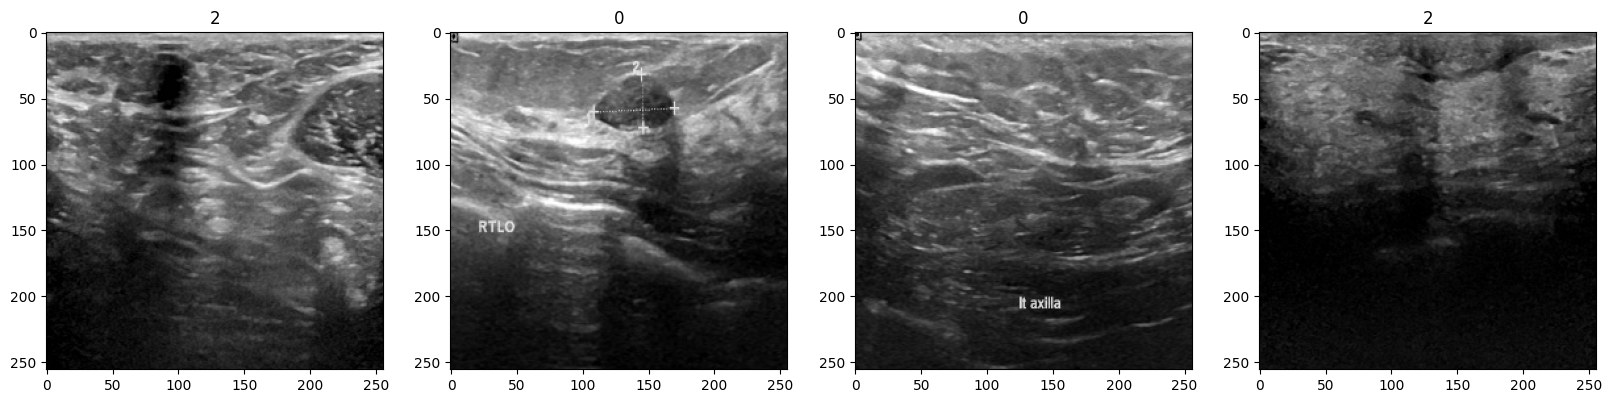

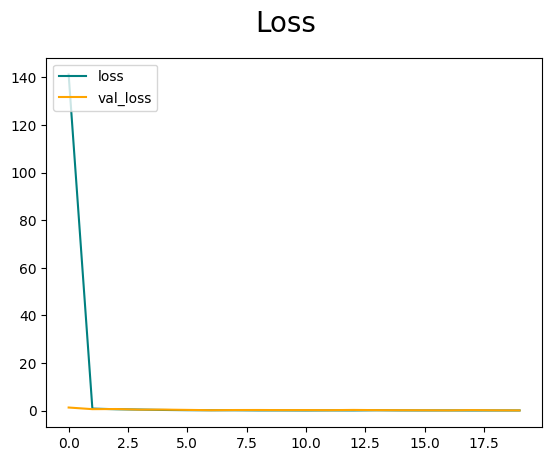

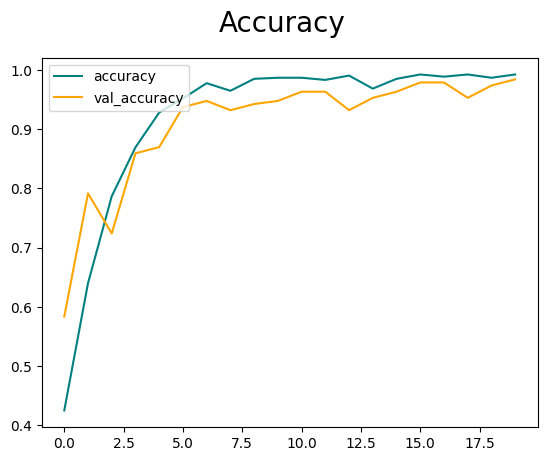

1/1 [==============================] - 0s 334ms/step
tf.Tensor(0.9811321, shape=(), dtype=float32) tf.Tensor(0.962963, shape=(), dtype=float32) tf.Tensor(0.9814815, shape=(), dtype=float32)


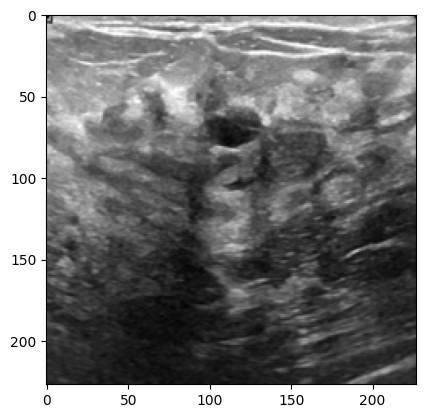

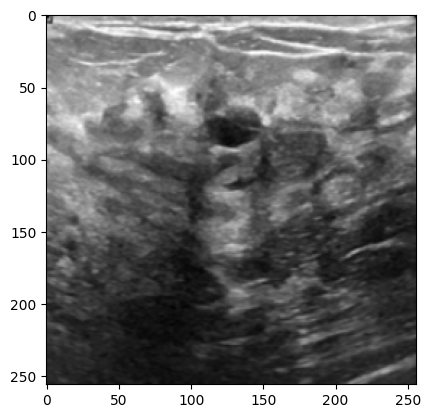

1/1 [==============================] - 0s 117ms/step
This is Malignant (M)


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
import numpy as np
import os
import tensorflow as tf
import cv2
import imghdr
from matplotlib import pyplot as plt
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy
from tensorflow.keras.models import load_model

data_dir = "/content/drive/MyDrive/Dataset_BUSI_with_GT"
print(os.listdir(os.path.join(data_dir, "normal")))
img_ext = ["jpeg", "jpg", "bmp", "png"]
print(img_ext)
print("--------------------------------------------------------------------------------------------")
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in img_ext:
                print("Image not in ext list {}".format(image_path))
                os.remove(image_path)
        except Exception as e:
            print("Issue with image {}".format(image_path))

img = cv2.imread(os.path.join("/content/drive/MyDrive/Dataset_BUSI_with_GT", "normal", "normal (114).png"))
tf.data.Dataset
data = tf.keras.utils.image_dataset_from_directory("/content/drive/MyDrive/Dataset_BUSI_with_GT")
data
data_iterator = data.as_numpy_iterator()
print(data_iterator)
batch = data_iterator.next()
print(batch[1])
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# preprocessing
scaled = batch[0].max() / 255
print(scaled)

train_size = int(len(data) * .7)  # 70% of data for training , 17 batches
print(train_size)
val_size = int(len(data) * .2) + 1  # 20% of data for validation , 6 batches
print(val_size)
test_size = int(len(data) * .1) + 1  # 10% of data for testing , 3 batches
print(test_size)
train_size + val_size + test_size

train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)
print(train)
print(val)
print(test)

# Convert target labels to one-hot encoded vectors
train = train.map(lambda x, y: (x, tf.one_hot(y, depth=3)))
val = val.map(lambda x, y: (x, tf.one_hot(y, depth=3)))
test = test.map(lambda x, y: (x, tf.one_hot(y, depth=3)))

# MODELING:)
model = Sequential()

model.add(Conv2D(16, (3, 3), 1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss=tf.losses.CategoricalCrossentropy(), metrics=['accuracy'])

model.summary()

logdir = "logs"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

print(pre.result(), re.result(), acc.result())

img = cv2.imread("/content/drive/MyDrive/benign (81).png")
plt.imshow(img)
plt.show()

resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

yhat = model.predict(np.expand_dims(resize / 255, 0))
predicted_class = np.argmax(yhat)

if predicted_class == 0:
    print("This is Benign (B)")
elif predicted_class == 1:
    print("This is Malignant (M)")
else:
    print("This is Normal (N)")





['Te-glTr_0003.jpg', 'Te-glTr_0004.jpg', 'Te-glTr_0006.jpg', 'Te-glTr_0005.jpg', 'Te-glTr_0001.jpg', 'Te-glTr_0002.jpg', 'Te-glTr_0000.jpg', 'Te-gl_0193.jpg', 'Te-gl_0082.jpg', 'Te-gl_0133.jpg', 'Te-gl_0150.jpg', 'Te-gl_0039.jpg', 'Te-gl_0173.jpg', 'Te-gl_0143.jpg', 'Te-gl_0088.jpg', 'Te-gl_0015.jpg', 'Te-gl_0212.jpg', 'Te-gl_0279.jpg', 'Te-gl_0146.jpg', 'Te-gl_0129.jpg', 'Te-gl_0200.jpg', 'Te-gl_0236.jpg', 'Te-gl_0142.jpg', 'Te-gl_0087.jpg', 'Te-gl_0207.jpg', 'Te-gl_0058.jpg', 'Te-gl_0270.jpg', 'Te-gl_0011.jpg', 'Te-gl_0036.jpg', 'Te-gl_0179.jpg', 'Te-gl_0016.jpg', 'Te-gl_0031.jpg', 'Te-gl_0023.jpg', 'Te-gl_0122.jpg', 'Te-gl_0294.jpg', 'Te-gl_0105.jpg', 'Te-gl_0119.jpg', 'Te-gl_0242.jpg', 'Te-gl_0187.jpg', 'Te-gl_0297.jpg', 'Te-gl_0089.jpg', 'Te-gl_0033.jpg', 'Te-gl_0149.jpg', 'Te-gl_0131.jpg', 'Te-gl_0256.jpg', 'Te-gl_0019.jpg', 'Te-gl_0296.jpg', 'Te-gl_0264.jpg', 'Te-gl_0192.jpg', 'Te-gl_0208.jpg', 'Te-gl_0281.jpg', 'Te-gl_0250.jpg', 'Te-gl_0269.jpg', 'Te-gl_0253.jpg', 'Te-gl_0224.j

KeyboardInterrupt: ignored

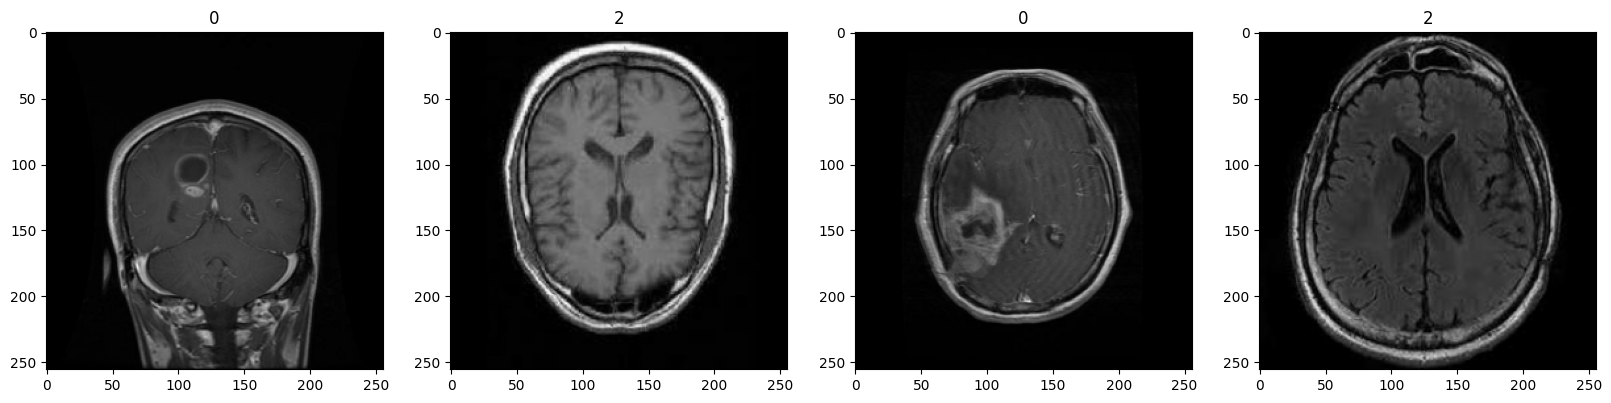

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
import numpy as np
import os
import tensorflow as tf
import cv2
import imghdr
from matplotlib import pyplot as plt
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy
from tensorflow.keras.models import load_model

data_dir = "/content/drive/MyDrive/Testing"
print(os.listdir(os.path.join(data_dir, "normal")))
img_ext = ["jpeg", "jpg", "bmp", "png"]
print(img_ext)
print("--------------------------------------------------------------------------------------------")
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in img_ext:
                print("Image not in ext list {}".format(image_path))
                os.remove(image_path)
        except Exception as e:
            print("Issue with image {}".format(image_path))

img = cv2.imread(os.path.join("/content/drive/MyDrive/Testing", "glioma", "Tr-glTr_0000.jpg"))
tf.data.Dataset
data = tf.keras.utils.image_dataset_from_directory("/content/drive/MyDrive/Testing")
data
data_iterator = data.as_numpy_iterator()
print(data_iterator)
batch = data_iterator.next()
print(batch[1])
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# preprocessing
scaled = batch[0].max() / 255
print(scaled)

train_size = int(len(data) * .7)  # 70% of data for training , 17 batches
print(train_size)
val_size = int(len(data) * .2) + 1  # 20% of data for validation , 6 batches
print(val_size)
test_size = int(len(data) * .1) + 1  # 10% of data for testing , 3 batches
print(test_size)
train_size + val_size + test_size

train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)
print(train)
print(val)
print(test)

# Convert target labels to one-hot encoded vectors
train = train.map(lambda x, y: (x, tf.one_hot(y, depth=3)))
val = val.map(lambda x, y: (x, tf.one_hot(y, depth=3)))
test = test.map(lambda x, y: (x, tf.one_hot(y, depth=3)))

# MODELING:)
model = Sequential()

model.add(Conv2D(16, (3, 3), 1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss=tf.losses.CategoricalCrossentropy(), metrics=['accuracy'])

model.summary()

logdir = "logs"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

print(pre.result(), re.result(), acc.result())

img = cv2.imread("/content/drive/MyDrive/Training/glioma/Tr-glTr_0003.jpg")
plt.imshow(img)
plt.show()

resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

yhat = model.predict(np.expand_dims(resize / 255, 0))
predicted_class = np.argmax(yhat)

if predicted_class == 0:
    print("This is Benign (B)")
elif predicted_class == 1:
    print("This is Malignant (M)")
else:
    print("This is Normal (N)")





In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the VGG16 model
vgg16 = VGG16(weights='imagenet')

# Define a data generator for the training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    vertical_flip=True,
)

# Load the training data
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',
)

# Compile the model
vgg16.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
vgg16.fit_generator(train_generator, epochs=20)

# Evaluate the model on the test set
test_generator = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',
)
test_loss, test_accuracy = vgg16.evaluate_generator(test_generator)

print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

# Make a prediction on an image
img = tf.keras.preprocessing.image.load_img('image.jpg', target_size=(256, 256))
img = tf.keras.preprocessing.image.img_to_array(img)
img = tf.expand_dims(img, 0)

# Reshape the predicted probabilities tensor to have shape [32, 4096]
yhat_reshaped = tf.reshape(vgg16.predict(img), [32, 4096])

# Get the predicted class
predicted_class = tf.argmax(yhat_reshaped, axis=-1)

print('Predicted class:', predicted_class)


Found 1311 images belonging to 4 classes.


<ipython-input-11-3e0188481a30>:28: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  vgg16.fit_generator(train_generator, epochs=20)


Epoch 1/20


InvalidArgumentError: ignored

Found 1311 files belonging to 4 classes.
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_27 (MaxPooli  (None, 127, 127, 16)      0         
 ng2D)                                                           
                                                                 
 conv2d_28 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_28 (MaxPooli  (None, 62, 62, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_29 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2

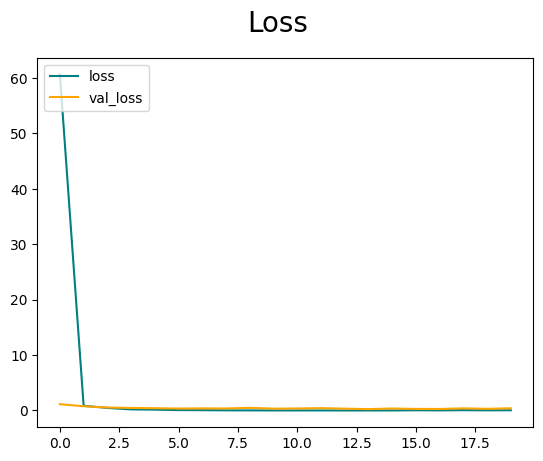

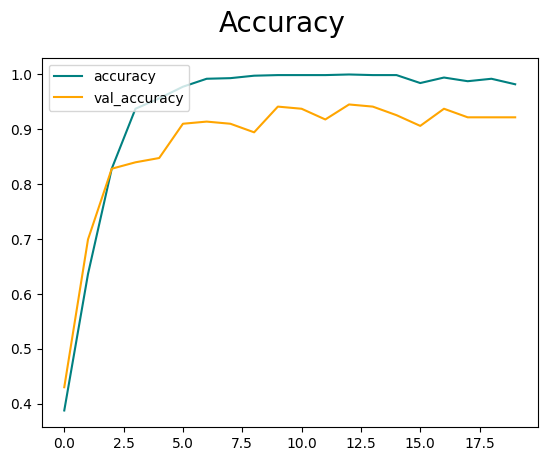

1/1 [==============================] - 0s 77ms/step
Precision: 0.88535035
Recall: 0.8742138
Accuracy: 0.8805031
Image loading failed.


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
import numpy as np
import os
import tensorflow as tf
import cv2
import imghdr
from matplotlib import pyplot as plt
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy
from tensorflow.keras.utils import to_categorical


# Define the classes (labels) for your new dataset
class_names = ["glioma", "meningioma", "notumor", "pituitary"]

# Update image extensions to include common image formats
img_ext = ["jpeg", "jpg", "bmp", "png"]

# Remove images that are not in the allowed extensions
data_dir = "/content/drive/MyDrive/Testing"

for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in img_ext:
                print("Image not in ext list {}".format(image_path))
                os.remove(image_path)
        except Exception as e:
            print("Issue with image {}".format(image_path))

# Load the dataset
data = tf.keras.utils.image_dataset_from_directory(data_dir, labels="inferred", label_mode="int", class_names=class_names)

# Split the dataset into training, validation, and test sets
train_size = int(0.7 * len(data))
val_size = int(0.2 * len(data))
test_size = len(data) - train_size - val_size
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

# Define and compile the model
model = Sequential()
model.add(Conv2D(16, (3, 3), 1, activation='relu', input_shape=(256, 256, 3)))

model.add(MaxPooling2D())
model.add(Conv2D(32, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(len(class_names), activation='softmax'))  # Output layer with the number of classes

model.compile(optimizer='adam', loss=tf.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

# Train the model
model.summary()
logdir = "logs"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

# Plot the training history
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# Evaluate the model on the test set
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    y = to_categorical(y, num_classes=len(class_names))  # Convert integer labels to one-hot encoded labels
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

# Get the metric values
precision = pre.result().numpy()
recall = re.result().numpy()
accuracy = acc.result().numpy()

print("Precision:", precision)
print("Recall:", recall)
print("Accuracy:", accuracy)

# Load an image for prediction
img = cv2.imread("/content/drive/MyDrive/Testing/glioma/Tr-glTr_0003.jpg")

if img is not None:
    resize = tf.image.resize(img, (256, 256)) / 255.0

    # Make a prediction on the image
    yhat = model.predict(np.expand_dims(resize, 0))
    predicted_class = class_names[np.argmax(yhat)]

    print("Predicted class:", predicted_class)
else:
    print("Image loading failed.")
